In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

pd.set_option("display.max_columns",None)
pd.set_option("display.max_row",None)
  
import warnings
warnings.filterwarnings("ignore")

from IPython.display import Image
sns.set(style="darkgrid",palette="pastel",color_codes=True)
sns.set_context("paper")

import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "seaborn"
from plotly.subplots import make_subplots

import folium

In [ ]:
confirmed_cases = pd.read_csv(r"https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
deaths_cases = pd.read_csv(r"https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
recovered_cases = pd.read_csv(r"https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")
cases_by_country = pd.read_csv(r"https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv")

##**CURRENT SITUATION (GLOBAL)**


In [ ]:
current_data = cases_by_country[['Active','Confirmed','Deaths','Recovered']]
current_situation = pd.DataFrame(current_data.sum(axis=0)).transpose()
pd.options.display.float_format = '{:,.0f}'.format
current_situation

,Active,Confirmed,Deaths,Recovered
0,"7,823,209","25,500,870","850,879","16,833,727"


In [ ]:
confirmed = confirmed_cases.copy().drop(['Province/State', 'Country/Region', 'Lat', 'Long'],axis=1).sum()
deaths = deaths_cases.copy().drop(['Province/State', 'Country/Region', 'Lat', 'Long'],axis=1).sum()
recovered = recovered_cases.copy().drop(['Province/State', 'Country/Region', 'Lat', 'Long'],axis=1).sum()

active = pd.Series(data=np.array([x1 - x2- x3 for (x1,x2,x3) in zip(confirmed.values,recovered.values,deaths.values)]),index=confirmed.index)

In [ ]:
chart1 = go.Figure()
chart1.add_trace(go.Scatter(x=confirmed.index, y=confirmed.values,mode='lines',name='Confirmed Cases'))
chart1.add_trace(go.Scatter(x=deaths.index, y=deaths.values,mode='lines',name='Deaths'))
chart1.add_trace(go.Scatter(x=recovered.index, y=recovered.values,mode='lines',name='Recovered'))
chart1.add_trace(go.Scatter(x=active.index, y=active.values, mode='lines', name='Active'))
chart1.update_layout(title='CORONAVIRUS CASES',yaxis_title = 'People Affected (Millions)',xaxis_title = 'Dates',xaxis_tickangle=270)
chart1.show()

##**Highest Mortality Rate**

In [ ]:
highest_mortality = cases_by_country[["Country_Region",'Confirmed','Deaths','Mortality_Rate']]

highest_mortality.sort_values('Mortality_Rate',ascending=False).head(10).round(2)

,Country_Region,Confirmed,Deaths,Mortality_Rate
185,Yemen,"1,958",566,29
104,MS Zaandam,9,2,22
85,Italy,"269,214","35,483",13
178,United Kingdom,"338,083","41,589",12
16,Belgium,"85,236","9,895",12
113,Mexico,"599,560","64,414",11
184,Western Sahara,10,1,10
77,Hungary,"6,257",616,10
62,France,"318,986","30,640",10
122,Netherlands,"73,233","6,252",9


##**Highest Active Cases**

In [ ]:
most_affected = cases_by_country[["Country_Region",'Confirmed','Active']]
top_most = most_affected.sort_values(['Confirmed'],ascending=False).head()
top_most

,Country_Region,Confirmed,Active
174,US,"6,031,065","3,662,641"
23,Brazil,"3,908,272","518,300"
79,India,"3,691,166","785,996"
140,Russia,"997,072","166,219"
134,Peru,"647,166","162,921"


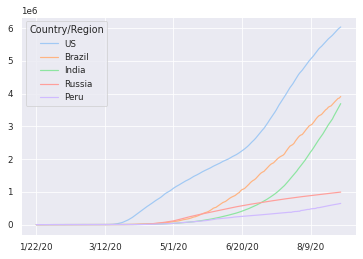

In [ ]:
data = confirmed_cases
data1 = data.drop(columns = ['Lat','Long'])
data2 = data1.groupby('Country/Region').sum()
data_transposed = data2.T
data_transposed.plot(y=top_most['Country_Region'],use_index=True)

##**Folium**

In [ ]:
data = cases_by_country[['Country_Region','Lat','Long_','Active']]
data1 = data.drop([48,104,75])
data1.Lat.astype(int)
data1.Long_.astype(int)
data1.Active.astype(int)
countries_location = data1.values.tolist()

map = folium.Map(location=[50,10],tiles ='Stamen Terrain',zoom_start=2)

fg = folium.FeatureGroup(name ='MyMap')

for country,latitude,longitude,act in countries_location:
  fg.add_child(folium.CircleMarker(location = [int(latitude),int(longitude)],
                  popup =str(country) + " : " + str(round(act)) ,color='Red'
                  ,fill=True,radius = 0.00005*act))

map.add_child(fg)


##**CURRENT SITUATION (INDIA)**

In [ ]:
fetching_india = cases_by_country[cases_by_country["Country_Region"] == "India"]
india_current_data = fetching_india[['Active','Confirmed','Deaths','Recovered']]
india_current_situation = pd.DataFrame(india_current_data)
india_current_data

,Active,Confirmed,Deaths,Recovered
79,"785,996","3,691,166","65,288","2,839,882"


####Fetching India's Data

In [ ]:
india_confirmed_cases = confirmed_cases[confirmed_cases["Country/Region"] == "India"]
india_confirmed_cases = india_confirmed_cases.copy().drop(['Province/State', 'Country/Region', 'Lat', 'Long'],axis=1).reset_index(drop=True).sum()

india_recovered_cases = recovered_cases[recovered_cases["Country/Region"] == "India"]
india_recovered_cases = india_recovered_cases.copy().drop(['Province/State', 'Country/Region', 'Lat', 'Long'],axis=1).reset_index(drop=True).sum()

india_deaths_cases = deaths_cases[confirmed_cases["Country/Region"] == "India"]
india_deaths_cases = india_deaths_cases.copy().drop(['Province/State', 'Country/Region', 'Lat', 'Long'],axis=1).reset_index(drop=True).sum()

active = pd.Series(data=np.array([x1 - x2- x3 for (x1,x2,x3) in zip(india_confirmed_cases.values,india_recovered_cases.values,india_deaths_cases.values)]),index=india_confirmed_cases.index)

##**Summary**

In [ ]:
chart2 = go.Figure()
chart2.add_trace(go.Scatter(x=india_confirmed_cases.index, y=india_confirmed_cases.values,mode='lines',name='Confirmed Cases'))
chart2.add_trace(go.Scatter(x=india_deaths_cases.index, y=india_deaths_cases.values,mode='lines',name='Deaths'))
chart2.add_trace(go.Scatter(x=india_recovered_cases.index, y=india_recovered_cases.values,mode='lines',name='Recovered'))
chart2.add_trace(go.Scatter(x=active.index, y=active.values, mode='lines', name='Active'))
chart2.update_layout(title='CORONAVIRUS CASES',yaxis_title = 'People Affected (Millions)',xaxis_title = 'Dates',xaxis_tickangle=270)
chart2.show()

##**Mortality Rate**

In [ ]:
fetching_india[["Mortality_Rate"]].round(2)

,Mortality_Rate
79,2
